## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 16
---------------------------------------

GOALS:

1. Work to understand when a linear model vs. non-linear model is a good choice.
2. Practice plotting residuals and regression lines.
3. Do an analysis using non-linear regression.


----------------------------------------------------------

This homework has **2 Questions** and **3 Exercises**

## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


## Announcements

**Come to Lab!** If you need help we are here to help!

## Day 16 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day16 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day16-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'



# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

## Paris Paintings Data - Load the data

To explore the ideas of modeling data we will use the Paris Paintings dataset.

- Source: Printed catalogs of 28 auction sales in Paris, 1764 - 1780 (Historical Data)
- Data curators Sandra van Ginhoven and Hilary Coe Cronheim (who were PhD students in the Duke Art, Law, and Markets Initiative at the time of putting together this dataset) translated and tabulated the catalogs
-  3393 paintings, their prices, and descriptive details from sales catalogs over 60 variables

[Variables in Paris Paintings Data](https://www2.stat.duke.edu/~cr173/Sta112_Fa16/data/paris_paintings.html)

This lab follows the Data Science in a Box units "Unit 4 - Deck 3: Modeling nonlinear relationships " by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [93]:
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [94]:
DF_raw_paintings

,name,sale,lot,position,dealer,year,origin_author,origin_cat,school_pntg,diff_origin,...,peasant,othgenre,singlefig,portrait,still_life,discauth,history,allegory,pastorale,other
0,L1764-2,L1764,2,0.032787,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
1,L1764-3,L1764,3,0.049180,L,1764,I,O,I,1,...,0,1,0,0,0,0,0,0,0,0
2,L1764-4,L1764,4,0.065574,L,1764,X,O,D/FL,1,...,0,0,0,0,0,0,0,0,0,0
3,L1764-5a,L1764,5,0.081967,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
4,L1764-5b,L1764,5,0.081967,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,R1764-498,R1764,498,0.992032,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3389,R1764-499,R1764,499,0.994024,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3390,R1764-500,R1764,500,0.996016,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3391,R1764-502a,R1764,502,1.000000,R,1764,F,O,F,1,...,0,0,1,0,0,0,0,0,0,0


In [95]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)

## Explore Linearity

Fit a model for Price as a function of size. Let's redo that analysis except this time focus only on paintings with area of less than 10,000 inches squared.

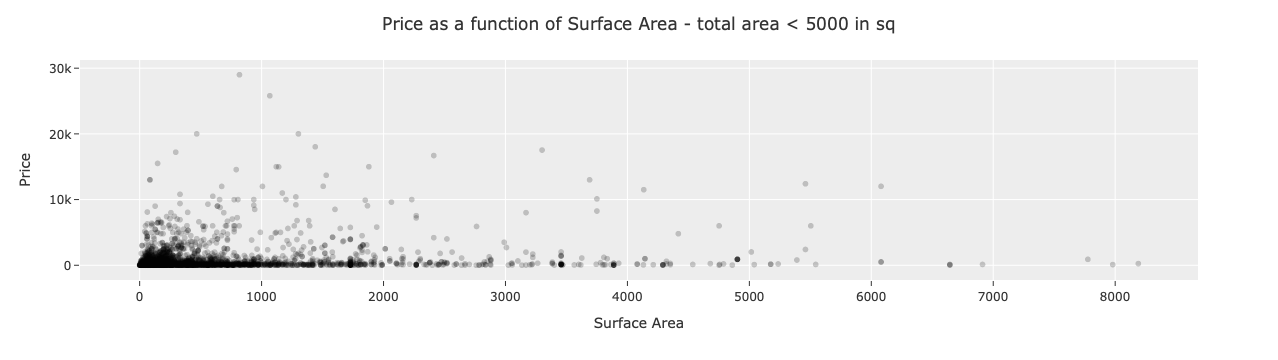

Model Score:
0.014875957473786783


In [96]:
#| code-fold: true
#| code-summary: "Answer to Exercise 2 Day 15 for paintings < 10000 in^2"

# Get the columns I care about
my_columns = ['Surface','price']
DF_model2 = DF[my_columns]

# Do some preprocessing - drop NA and make the Surface variable a float
DF_model2.dropna(inplace=True)
DF_model2['Surface'] = DF_model2['Surface'].apply(lambda x: float(x))

# Mask the data for surface area less than 10,000
mask = DF_model2['Surface'] <= 10_000
DF_model2 = DF_model2[mask]

# Make a Scatter plot
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='Price')


fig.show()

# Create the X and y variables for Linear Regression
X = DF_model2['Surface'].values.reshape(-1,1)
y = DF_model2['price'].values

# Create linear regression object - a random straight line
LM = LinearRegression()
# Train the model using the data
LM.fit(X, y)

# The score from my model
print('Model Score:')
print(LM.score(X,y))

**Exercise 1** Create a Residual plot for the model above.

1. Get the predictions - store these in a column in the data frame

```{python}
LM.predict(X)
```

2. Calculate the residuals - store these in a column in the data frame
```{python}
'Residual' = 'Real Value in the Data' - 'Value Predicted by LM'
```

3. Plot the result
```{python}
px.scatter(df,x='Value Predicted by LM',y='Residual')
```


See if you can recreate the plot shown in the lecture.

In [97]:
DF_model2['Price_predicted'] = LM.predict(X)
DF_model2

,Surface,price,Price_predicted
0,1091.5,360.0,904.234443
1,252.0,6.0,683.985984
2,208.0,12.0,672.442289
3,252.0,6.0,683.985984
4,252.0,6.0,683.985984
...,...,...,...
3388,387.0,18.0,719.404140
3389,214.5,25.0,674.147607
3390,720.0,80.0,806.768925
3391,621.0,5.0,780.795610


In [98]:
DF_model2['Residual'] = DF_model2['price']-DF_model2['Price_predicted']
DF_model2

,Surface,price,Price_predicted,Residual
0,1091.5,360.0,904.234443,-544.234443
1,252.0,6.0,683.985984,-677.985984
2,208.0,12.0,672.442289,-660.442289
3,252.0,6.0,683.985984,-677.985984
4,252.0,6.0,683.985984,-677.985984
...,...,...,...,...
3388,387.0,18.0,719.404140,-701.404140
3389,214.5,25.0,674.147607,-649.147607
3390,720.0,80.0,806.768925,-726.768925
3391,621.0,5.0,780.795610,-775.795610


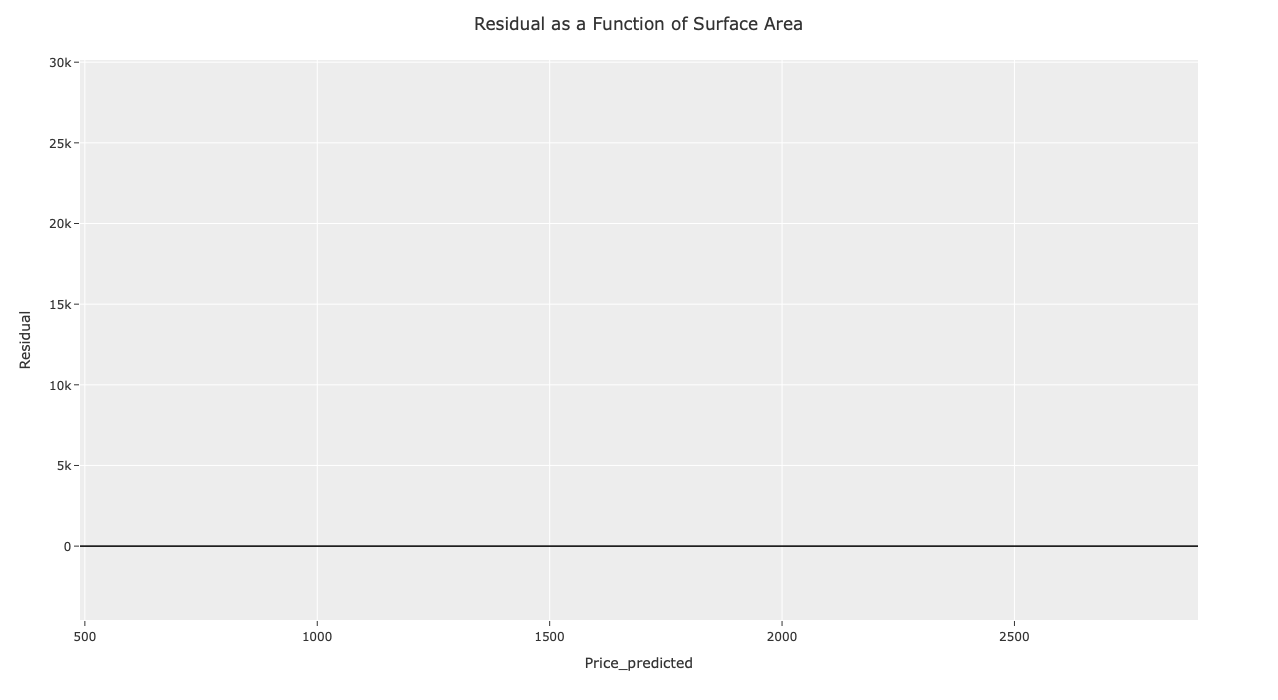

In [99]:
fig = px.scatter(DF_model2,
                 x='Price_predicted',
                 y='Residual')

fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"})

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of Surface Area',
                  title_x=0.5,
                  autosize=False,
                  width=1000,
                  height=700)

fig.show()

**Q1** What do you see here? Does this residual data seem uniformly distributed?


#### No this redidual data does not seem to be uniformly distributed, there is a high concentration of data on the left of our graph that is relativly close to the zero line, but there is kind of a weird line below the resdiual zero line that appears to have a negative slope. there is also a lot more data to the left side of this plot and not much random scatter as it seems relativly clumped. 

## From Lecture - Consider the skew in the data

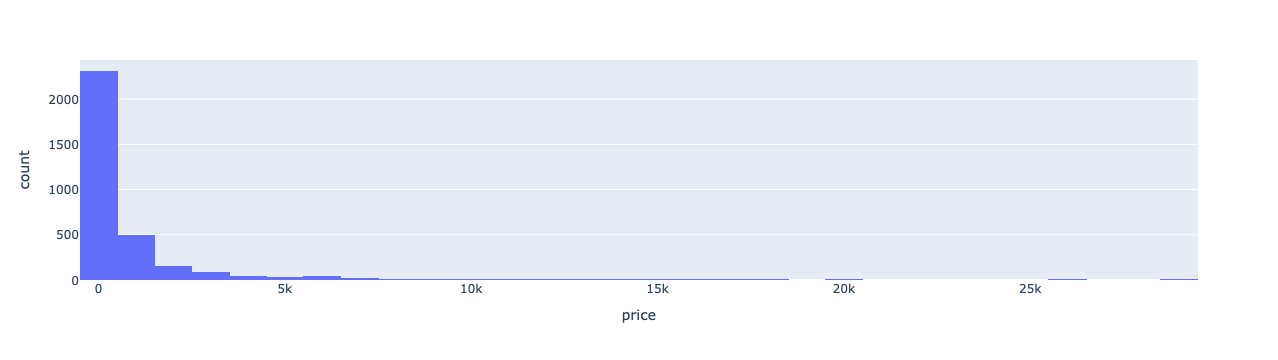

In [100]:
# Plot a histogram - notice that it is very skewed
fig = px.histogram(DF_model2,x='price',nbins =30)
fig.show()

In [101]:
# Us numpy to take the natural log of the data - removing the exponential decay
DF_model2['log_price'] = np.log(DF_model2['price'])

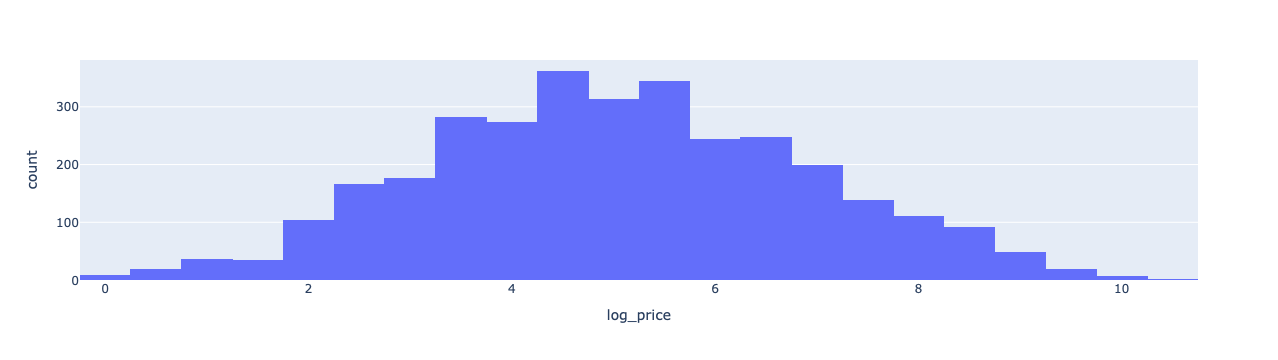

In [102]:
# Plot a histogram of the log(price) - notice we have removed the skew
fig = px.histogram(DF_model2,x='log_price',nbins =30)

fig.show()

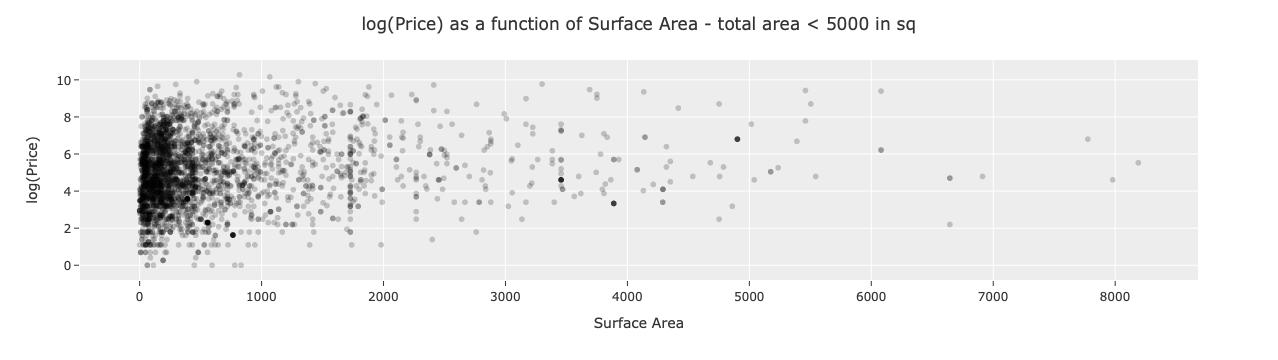

In [103]:
# Look at the scatter plot of the log(price)
fig = px.scatter(DF_model2,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='log(Price) as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='log(Price)')


fig.show()

**Q2** What is different about the histogram and the scatter plots after taking the natural log?

#### the histogram went from being heavly skewed right to being a pretty semetrical graph. The residual plot went from being no random scatter and kind of a random cluster to having a more uniformly random scatter which has no real patterns. 

**Exercise 2:** Redo the linear regression analysis except this time use the log_price.

- Find the linear regression model (LM)
- Calculate the residual
- Plot the Residual as a function of the predicted log price
- Plot a scatter plot of the data with the linear regression line added.

*HINT* You can see my results in the lecture notes!

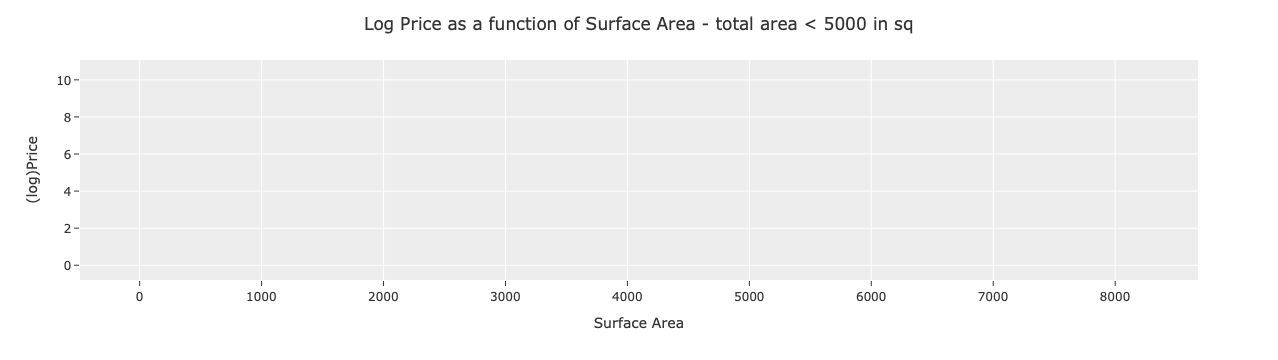

Model Score:
0.013268243020669424


In [104]:
my_columns = ['Surface','log_price']
DF_log = DF_model2[my_columns]

DF_log.dropna(inplace=True)
DF_log['Surface'] = DF_log['Surface'].apply(lambda x: float(x))

mask = DF_log['Surface'] <= 10_000
DF_log = DF_log[mask]

fig = px.scatter(DF_log,
                 x='Surface',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Log Price as a function of Surface Area - total area < 5000 in sq',
                  title_x=0.5,
                  xaxis_title='Surface Area',
                  yaxis_title='(log)Price')


fig.show()

X = DF_log['Surface'].values.reshape(-1,1)
y = DF_log['log_price'].values

LM = LinearRegression()

LM.fit(X, y)

print('Model Score:')
print(LM.score(X,y))

In [105]:
DF_log['log_price_predicted'] = LM.predict(X)
DF_log

,Surface,log_price,log_price_predicted
0,1091.5,5.886104,5.170882
1,252.0,1.791759,4.971419
2,208.0,2.484907,4.960965
3,252.0,1.791759,4.971419
4,252.0,1.791759,4.971419
...,...,...,...
3388,387.0,2.890372,5.003495
3389,214.5,3.218876,4.962509
3390,720.0,4.382027,5.082615
3391,621.0,1.609438,5.059093


In [106]:
DF_log['Residual'] = DF_log['log_price']-DF_log['log_price_predicted']
DF_log

,Surface,log_price,log_price_predicted,Residual
0,1091.5,5.886104,5.170882,0.715222
1,252.0,1.791759,4.971419,-3.179660
2,208.0,2.484907,4.960965,-2.476058
3,252.0,1.791759,4.971419,-3.179660
4,252.0,1.791759,4.971419,-3.179660
...,...,...,...,...
3388,387.0,2.890372,5.003495,-2.113123
3389,214.5,3.218876,4.962509,-1.743634
3390,720.0,4.382027,5.082615,-0.700588
3391,621.0,1.609438,5.059093,-3.449655


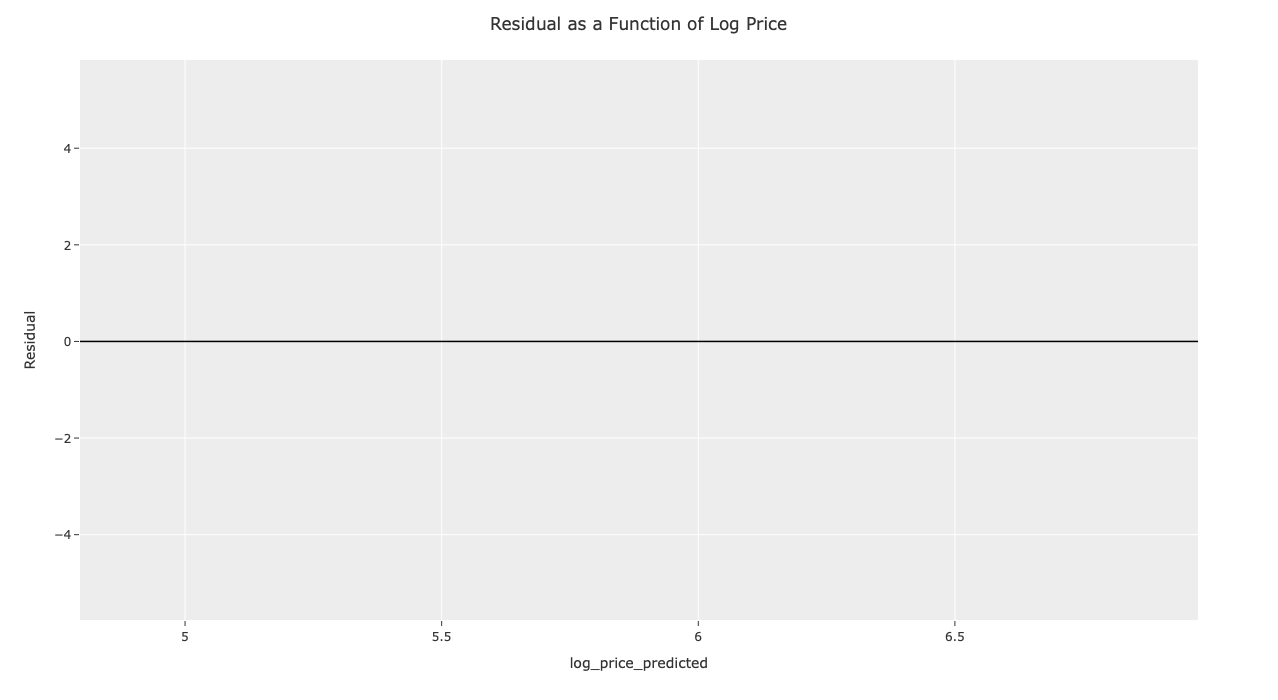

In [107]:
fig = px.scatter(DF_log,
                 x='log_price_predicted',
                 y='Residual')

fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"})

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of Log Price',
                  title_x=0.5,
                  autosize=False,
                  width=1000,
                  height=700)

fig.show()

### What did we learn...

What is the model telling me?

$$ \hat{\log(price)} = 4.912 + 0.00024(Surface Area)$$

so we can calculate (see the lecture for details!)

$$ (SA+1) \sim 1.0002400288023041 * SA$$

This tells us that increase the area of the painting by one square inch increases the price by a factor of 1.0002400288023041 or about 0.024%.

There is a small positive increase in the price as the surface area increases, on average. 

Can we predict the price using the surface area? Look at LM.score(X,y)...

It does not appear that our logistic regression is a good predictor of the price. Even though it looks like we captured a good linear relationship, we do not have a good predictor. The scatter is still very large!

BUT - we are still able to see a linear trend in the model. There is a relationship here even though the data is very noisy!

**Exercise 3** Redo the full analysis except this time try using just height to predict price.

- Do a standard linear regression of the height vs. the price (without log) discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price.....
- Do a linear regression of the height vs. log_price and discuss the results. This should include a plot of the residuals and a plot showing the linear fit. You should also talk about what the score, intercept and coefficient of the model are telling you. EG. As the height increases by 1in the price..... Remember in this case you have to use the rules of logs and exponents to interpret the results.

Which of these models do you think is doing a better job of capturing the functional relationships in the price vs height data? Why?

In [108]:
DF.columns

Index(['name', 'sale', 'lot', 'position', 'dealer', 'year', 'origin_author',
       'origin_cat', 'school_pntg', 'diff_origin', 'logprice', 'price',
       'count', 'subject', 'authorstandard', 'artistliving', 'authorstyle',
       'author', 'winningbidder', 'winningbiddertype', 'endbuyer', 'Interm',
       'type_intermed', 'Height_in', 'Width_in', 'Surface_Rect', 'Diam_in',
       'Surface_Rnd', 'Shape', 'Surface', 'material', 'mat', 'materialCat',
       'quantity', 'nfigures', 'engraved', 'original', 'prevcoll', 'othartist',
       'paired', 'figures', 'finished', 'lrgfont', 'relig', 'landsALL',
       'lands_sc', 'lands_elem', 'lands_figs', 'lands_ment', 'arch', 'mytho',
       'peasant', 'othgenre', 'singlefig', 'portrait', 'still_life',
       'discauth', 'history', 'allegory', 'pastorale', 'other'],
      dtype='object')

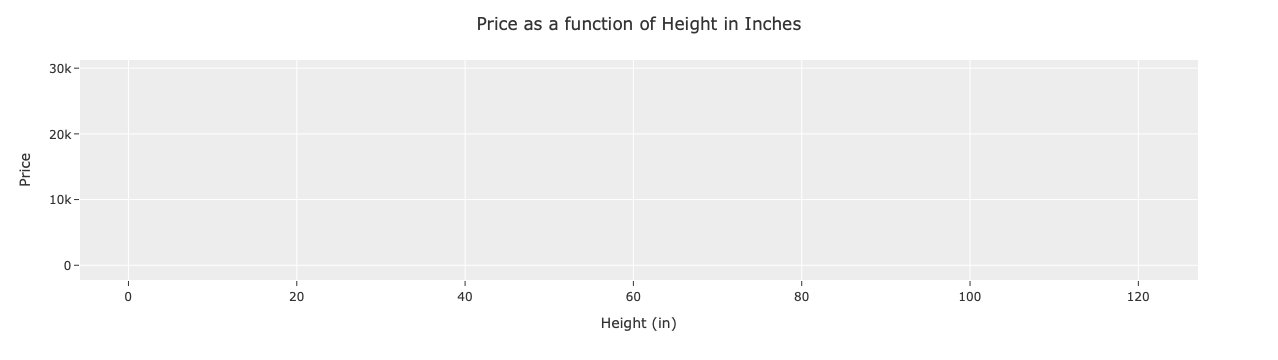

Model Score:
0.01276057594959179


In [109]:
my_columns = ['Height_in','price']
DF_h = DF[my_columns]

DF_h.dropna(inplace=True)
DF_h['Height_in'] = DF_h['Height_in'].apply(lambda x: float(x))

fig = px.scatter(DF_h,
                 x='Height_in',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a function of Height in Inches',
                  title_x=0.5,
                  xaxis_title='Height (in)',
                  yaxis_title='Price')


fig.show()

X = DF_h['Height_in'].values.reshape(-1,1)
y = DF_h['price'].values

LM = LinearRegression()

LM.fit(X, y)

print('Model Score:')
print(LM.score(X,y))

In [110]:
DF_h['price_predicted'] = LM.predict(X)
DF_h

,Height_in,price,price_predicted
0,37.0,360.0,1043.148094
1,18.0,6.0,756.713619
2,13.0,12.0,681.336126
3,14.0,6.0,696.411624
4,14.0,6.0,696.411624
...,...,...,...
3388,18.0,18.0,756.713619
3389,13.0,25.0,681.336126
3390,24.0,80.0,847.166611
3391,27.0,5.0,892.393107


In [111]:
DF_h['Residual'] = DF_h['price']-DF_h['price_predicted']
DF_h

,Height_in,price,price_predicted,Residual
0,37.0,360.0,1043.148094,-683.148094
1,18.0,6.0,756.713619,-750.713619
2,13.0,12.0,681.336126,-669.336126
3,14.0,6.0,696.411624,-690.411624
4,14.0,6.0,696.411624,-690.411624
...,...,...,...,...
3388,18.0,18.0,756.713619,-738.713619
3389,13.0,25.0,681.336126,-656.336126
3390,24.0,80.0,847.166611,-767.166611
3391,27.0,5.0,892.393107,-887.393107


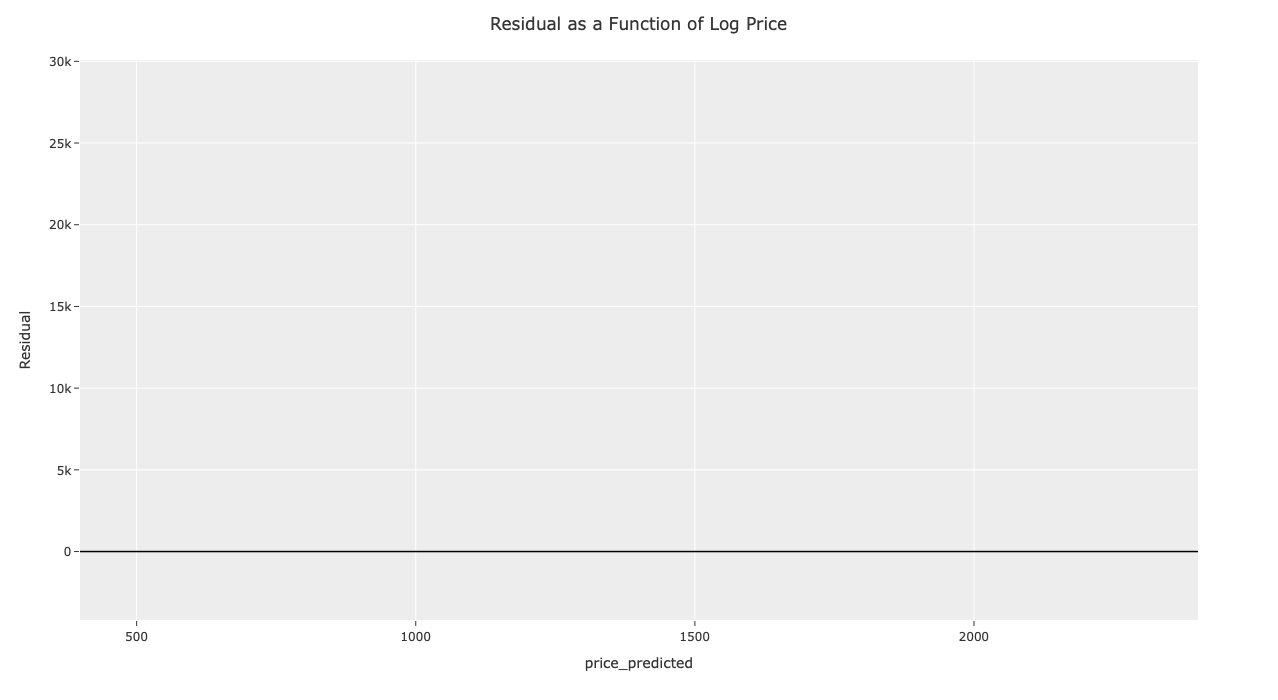

In [112]:
fig = px.scatter(DF_h,
                 x='price_predicted',
                 y='Residual')

fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"})

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of Log Price',
                  title_x=0.5,
                  autosize=False,
                  width=1000,
                  height=700)

fig.show()

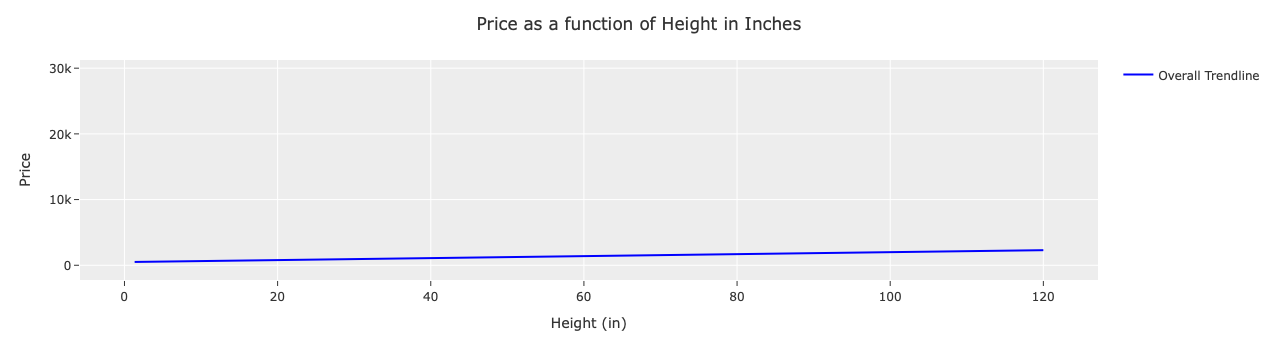

Model Score:
0.01276057594959179


In [113]:
my_columns = ['Height_in','price']
DF_h = DF[my_columns]

DF_h.dropna(inplace=True)
DF_h['Height_in'] = DF_h['Height_in'].apply(lambda x: float(x))

fig = px.scatter(DF_h,
                 x='Height_in',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2,
                 trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')

fig.update_layout(template="ggplot2",
                  title='Price as a function of Height in Inches',
                  title_x=0.5,
                  xaxis_title='Height (in)',
                  yaxis_title='Price')

fig.show()

X = DF_h['Height_in'].values.reshape(-1,1)
y = DF_h['price'].values

LM = LinearRegression()

LM.fit(X, y)

print('Model Score:')
print(LM.score(X,y))

In [118]:
print(LM.coef_)
print('------------------------------')
print(LM.intercept_)

[0.01144567]
------------------------------
4.84813784928647


#### From the first model we can see that most of our data is clustered around 10-20 inches for the height and the majoreity of our data is below 10k in the price. There does not appear to be a linear relationship between height in inches and the price of the paitings. We can see from the residual plot that there is not random scatter meaning that the line of best fit is probably not the most reliable when it comes to predicting the height. The model has a score of .012 which is very low and therfor not a really accurate predictor. We can see from the coefficent of .0114 and the intercept of 4.848 that this line predicts that for every one inch the height increases, the price is predicted to increase by .0114. This also means that if the height is zero inches that the painting would be at least 4.848 in price. we can see from the predicted overall trend line that this data may have a slight positive linear relationship but this is most likely to the heavy skew we obsereve. 

In [119]:
DF['log_price'] = np.log(DF_model2['price'])

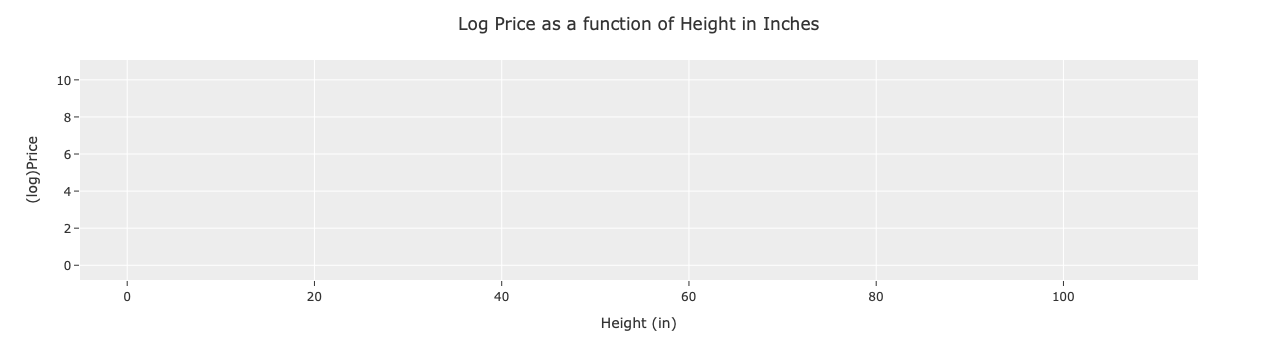

Model Score:
0.00772690776672369


In [120]:
my_columns = ['Height_in','log_price']
DF_hl = DF[my_columns]

DF_hl.dropna(inplace=True)
DF_hl['Height_in'] = DF_hl['Height_in'].apply(lambda x: float(x))

fig = px.scatter(DF_hl,
                 x='Height_in',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Log Price as a function of Height in Inches',
                  title_x=0.5,
                  xaxis_title='Height (in)',
                  yaxis_title='(log)Price')


fig.show()

X = DF_hl['Height_in'].values.reshape(-1,1)
y = DF_hl['log_price'].values

LM = LinearRegression()

LM.fit(X, y)

print('Model Score:')
print(LM.score(X,y))

In [121]:
DF_hl['log_price_predicted'] = LM.predict(X)
DF_hl

,Height_in,log_price,log_price_predicted
0,37.0,5.886104,5.271628
1,18.0,1.791759,5.054160
2,13.0,2.484907,4.996932
3,14.0,1.791759,5.008377
4,14.0,1.791759,5.008377
...,...,...,...
3388,18.0,2.890372,5.054160
3389,13.0,3.218876,4.996932
3390,24.0,4.382027,5.122834
3391,27.0,1.609438,5.157171


In [122]:
DF_hl['Residual'] = DF_hl['log_price']-DF_hl['log_price_predicted']
DF_hl

,Height_in,log_price,log_price_predicted,Residual
0,37.0,5.886104,5.271628,0.614476
1,18.0,1.791759,5.054160,-3.262400
2,13.0,2.484907,4.996932,-2.512025
3,14.0,1.791759,5.008377,-3.216618
4,14.0,1.791759,5.008377,-3.216618
...,...,...,...,...
3388,18.0,2.890372,5.054160,-2.163788
3389,13.0,3.218876,4.996932,-1.778056
3390,24.0,4.382027,5.122834,-0.740807
3391,27.0,1.609438,5.157171,-3.547733


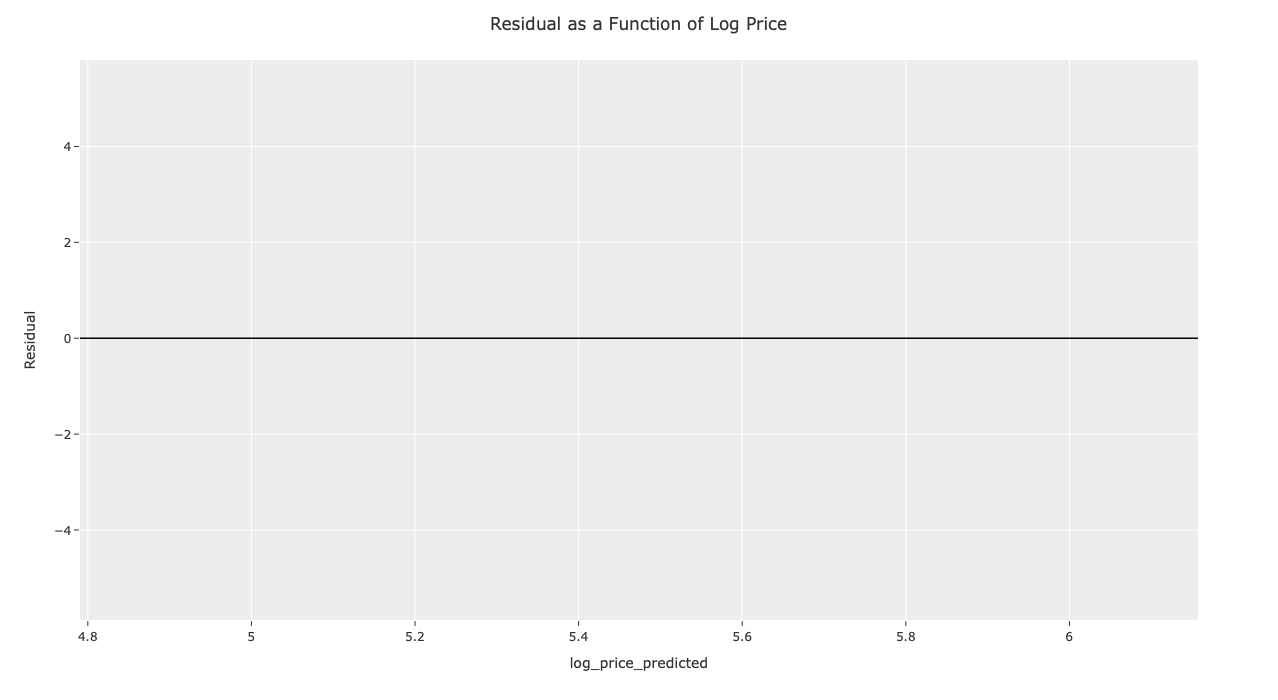

In [123]:
fig = px.scatter(DF_hl,
                 x='log_price_predicted',
                 y='Residual')

fig.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"})

fig.update_layout(template="ggplot2",
                  title='Residual as a Function of Log Price',
                  title_x=0.5,
                  autosize=False,
                  width=1000,
                  height=700)

fig.show()

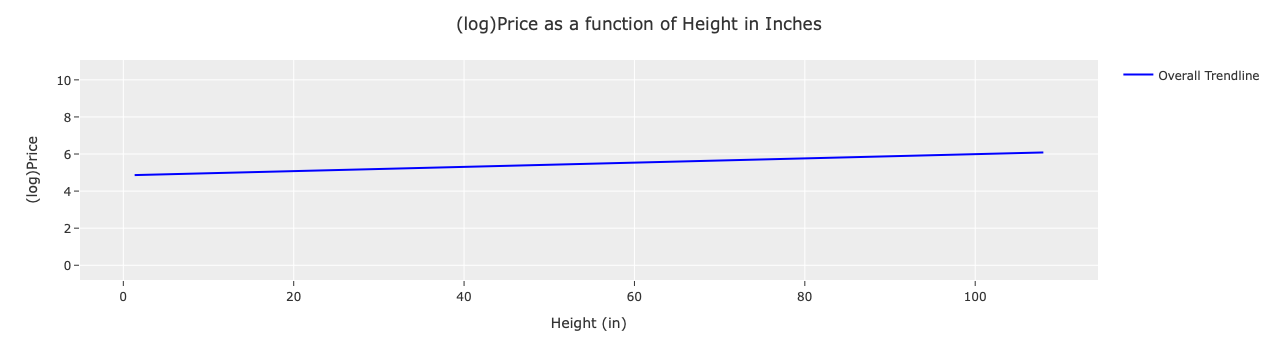

Model Score:
0.00772690776672369


In [126]:
my_columns = ['Height_in','log_price']
DF_hl = DF[my_columns]

DF_hl.dropna(inplace=True)
DF_hl['Height_in'] = DF_hl['Height_in'].apply(lambda x: float(x))

fig = px.scatter(DF_hl,
                 x='Height_in',
                 y='log_price',
                 color_discrete_sequence=['black'],
                 opacity=0.2,
                 trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')

fig.update_layout(template="ggplot2",
                  title='(log)Price as a function of Height in Inches',
                  title_x=0.5,
                  xaxis_title='Height (in)',
                  yaxis_title='(log)Price')

fig.show()

X = DF_hl['Height_in'].values.reshape(-1,1)
y = DF_hl['log_price'].values

LM = LinearRegression()

LM.fit(X, y)

print('Model Score:')
print(LM.score(X,y))

In [127]:
print(LM.coef_)
print('------------------------------')
print(LM.intercept_)

[0.01144567]
------------------------------
4.84813784928647


#### As we can see in the model above the data is much more spread out using the log price and it is easier to get a veiw of how the heigh in inches effectes the log price. We can see that the residual plot has very good random scatter meaning that this linear regression is pretty close to the predicted vs the actual log price. We can see that although the residual plot has good random scatter the model score is still very low at .0077. this would make sense because as we can see from the model that an increase in height really has no corrolation to the log price increasing. The linear regression has a coeffecent of .0114 and an intercept of 4.848 which is the exact same for the regular price plot above. Although these are pretty simular I think that the log price is going to give you a more accurate look into the data because the points are spread out in a way that is visually easier to interpret. overall i think it is safe to guess that the height of a painting does not have an effect on the price of the painting or the log price of the painting. 